In [70]:
# Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualization condition
fig, ax = plt.subplots()
%matplotlib inline 

In [71]:
df = pd.read_csv('german_data.csv',sep=';')
# To display the top 5 rows
df.head(5)


,CheckingAcc,Duration,CreditHistory,Purpose,CreditAmount,SavingsAcc,EmploymentStatus,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherInstallment,Housing,ExistingCredits,Job,Dependents,Telephone,ResidenceStatus,CustomerType
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
df.tail(5) 


,CheckingAcc,Duration,CreditHistory,Purpose,CreditAmount,SavingsAcc,EmploymentStatus,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherInstallment,Housing,ExistingCredits,Job,Dependents,Telephone,ResidenceStatus,CustomerType
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1


In [5]:
# Checking the data type
df.dtypes

CheckingAcc         object
Duration             int64
CreditHistory       object
Purpose             object
CreditAmount         int64
SavingsAcc          object
EmploymentStatus    object
InstallmentRate      int64
PersonalStatus      object
OtherDebtors        object
ResidenceCurrent     int64
Property            object
Age                  int64
OtherInstallment    object
Housing             object
ExistingCredits      int64
Job                 object
Dependents           int64
Telephone           object
ResidenceStatus     object
CustomerType         int64
dtype: object

In [7]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,CheckingAcc,CreditHistory,Purpose,SavingsAcc,EmploymentStatus,PersonalStatus,OtherDebtors,Property,OtherInstallment,Housing,Job,Telephone,ResidenceStatus
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [11]:
obj_df["CheckingAcc"].value_counts()

A14    394
A11    274
A12    269
A13     63
Name: CheckingAcc, dtype: int64

In [12]:
cleanup_nums = {"CheckingAcc":     {"A11": "<0", "A12": "<200","A13": ">200", "A14": "no_acc"},
                "CreditHistory": {"A30": "no credits", "A31": "all credits", "A32": "paid back", "A33": "delay in pay back",
                                  "A34": " existing other credits"},
               "Purpose": {"A40": "car (new)","A41": "car (used)","A42": "furniture/equipment",
                           "A43": "radio/television","A44": "domestic appliances","A45": "repairs","A46": "education",
                           "A47": "(vacation - does not exist?)","A48": "retraining","A49": "business","A410": "others"},
                "SavingsAcc":{"A61": "<100", "A62": "100-500","A63": "500-1000", "A64": ">=1000","A65": "no_acc"},
                "EmploymentStatus":{"A71": "unemployed", "A72": "<1","A73": "1-4", "A74": "4-7","A75": ">=7"},
                "PersonalStatus":{"A91": "male : divorced/separated", "A92": "female : divorced/separated/married",
                                  "A93": "male : single", "A94": "male : married/widowed","A95": "female : single"},
                "OtherDebtors":{"A101": "none", "A102": "co-applicant","A103": "guarantor"},
                "Property":{"A121": "real estate", "A122": "society savings","A123": "car or other,","A124": "no property"},
                "OtherInstallment":{"A141": "bank", "A142": "stores","A143": "none"},
                "Housing":{"A151": "rent", "A152": "own","A153": "free"},
                "Job":{"A171": "unskilled - non-resident", "A172": "unskilled - resident","A173": "skilled employee","A174": "self-employed"},
                "Telephone":{"A191": "none", "A192": "yes"},
                "ResidenceStatus":{"A201": "yes", "A202": "no"}
}

In [19]:
df1 = df.replace(cleanup_nums)

In [20]:
# Check the type of features again
df1.dtypes

CheckingAcc         object
Duration             int64
CreditHistory       object
Purpose             object
CreditAmount         int64
SavingsAcc          object
EmploymentStatus    object
InstallmentRate      int64
PersonalStatus      object
OtherDebtors        object
ResidenceCurrent     int64
Property            object
Age                  int64
OtherInstallment    object
Housing             object
ExistingCredits      int64
Job                 object
Dependents           int64
Telephone           object
ResidenceStatus     object
CustomerType         int64
dtype: object

In [14]:
# Null data check
df1.isna().sum()

CheckingAcc         0
Duration            0
CreditHistory       0
Purpose             0
CreditAmount        0
SavingsAcc          0
EmploymentStatus    0
InstallmentRate     0
PersonalStatus      0
OtherDebtors        0
ResidenceCurrent    0
Property            0
Age                 0
OtherInstallment    0
Housing             0
ExistingCredits     0
Job                 0
Dependents          0
Telephone           0
ResidenceStatus     0
CustomerType        0
dtype: int64

In [21]:
# Dataframe - numerical values containing
df1_num = df1.select_dtypes(include = ['int64']).copy()

In [22]:
# Dataframe - categorical values containing
df1_obj = df1.select_dtypes(include=['object']).copy()

## Distribution of numerical features
1. Histogram 
2. Boxplot

array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'CreditAmount'}>,
        <AxesSubplot:title={'center':'InstallmentRate'}>],
       [<AxesSubplot:title={'center':'ResidenceCurrent'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ExistingCredits'}>],
       [<AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'CustomerType'}>, <AxesSubplot:>]],
      dtype=object)

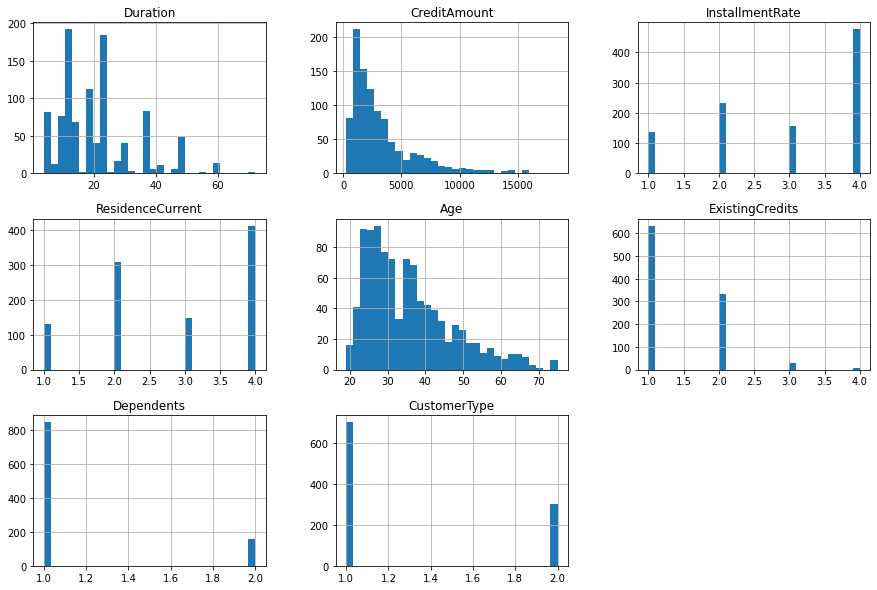

In [27]:
# Plot a histogram for each numerical values in the df1
df1.hist(bins=30, figsize=(15, 10))

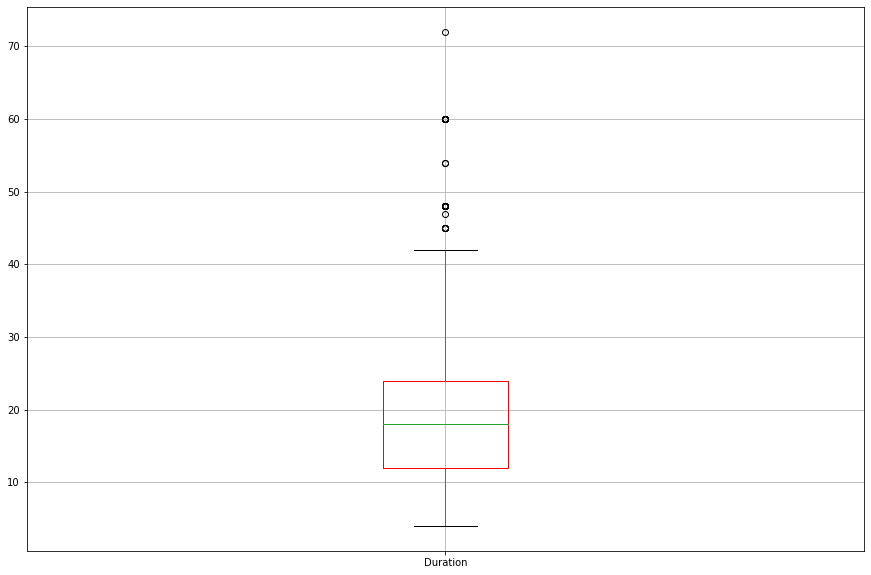

In [28]:
# Plot a boxplot for each numerical values in the df1
# Boxplot for the column 'Duration'
boxplot = df1.boxplot(column = ['Duration'], figsize = (15,10), boxprops = dict(color = 'red'))

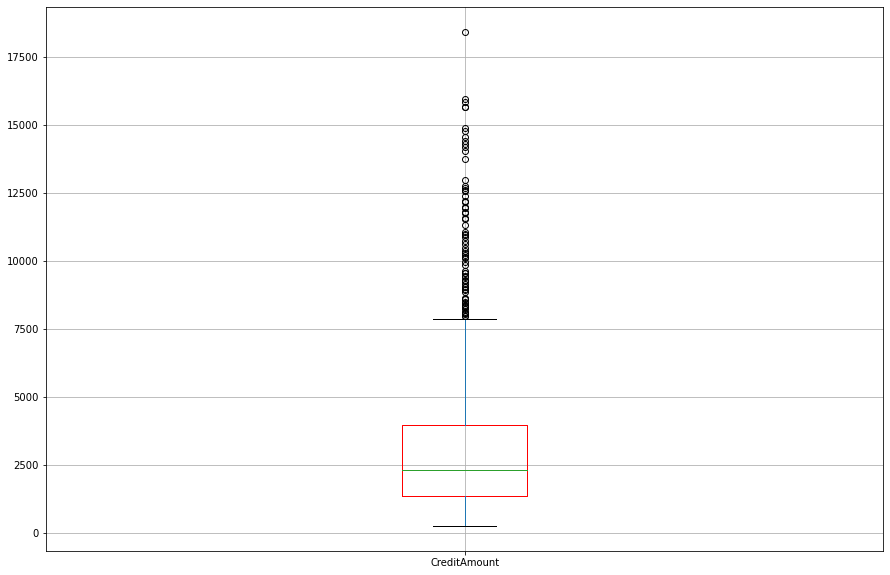

In [29]:
# Boxplot for CreditAmount
boxplot = df1.boxplot(column = ['CreditAmount'], figsize = (15,10), boxprops = dict(color = 'red'))

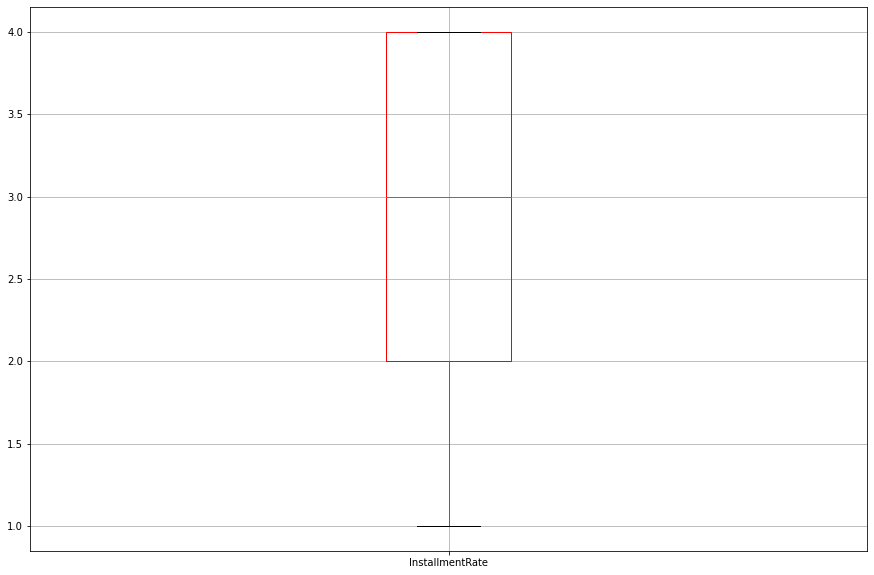

In [30]:
# Boxplot for InstallmentRate
boxplot = df1.boxplot(column = ['InstallmentRate'], figsize = (15,10), boxprops = dict(color = 'red'))

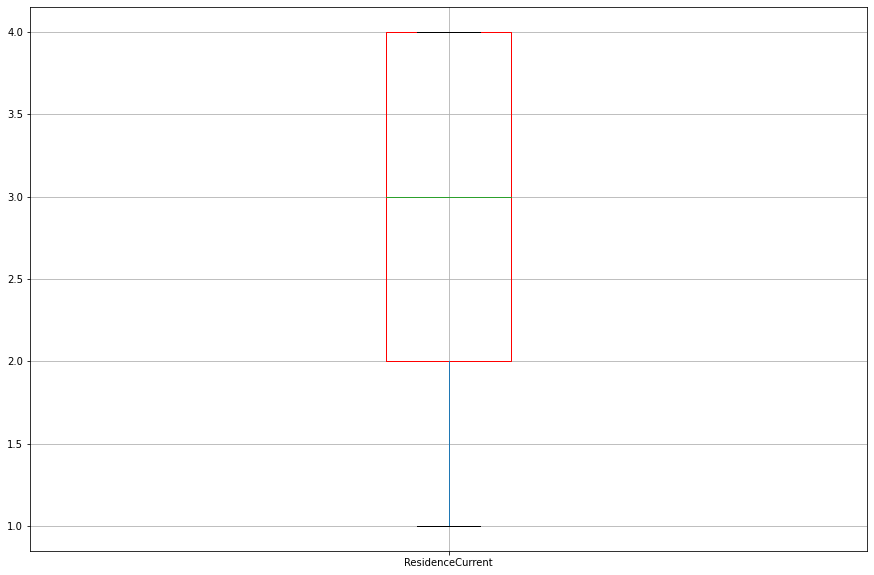

In [31]:
# Boxplot for ResidenceCurrent
boxplot = df1.boxplot(column = ['ResidenceCurrent'], figsize = (15,10), boxprops = dict(color = 'red'))

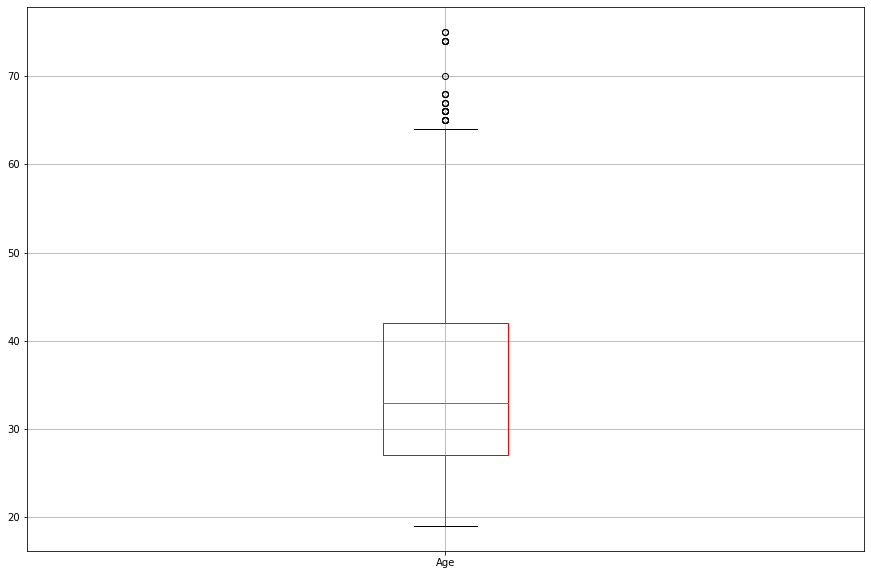

In [32]:
# Boxplot for Age
boxplot = df1.boxplot(column = ['Age'], figsize = (15,10), boxprops = dict(color = 'red'))

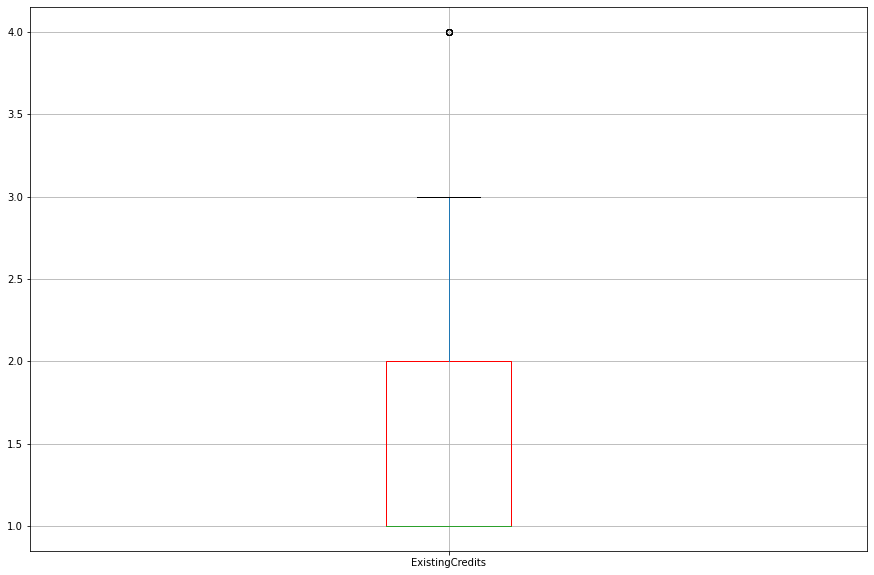

In [33]:
# Boxplot for ExistingCredits
boxplot = df1.boxplot(column = ['ExistingCredits'], figsize = (15,10), boxprops = dict(color = 'red'))

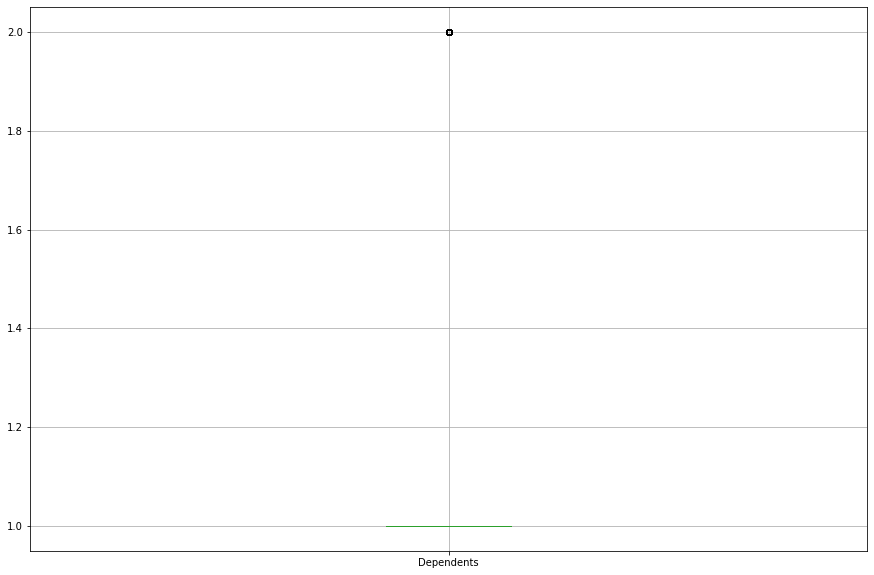

In [34]:
# Boxplot for Dependents
boxplot = df1.boxplot(column = ['Dependents'], figsize = (15,10), boxprops = dict(color = 'red'))

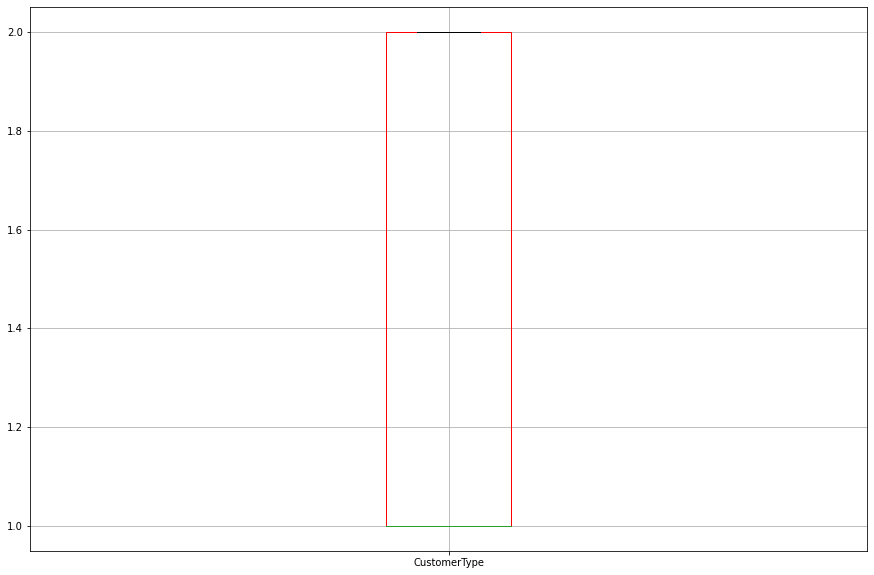

In [35]:
# Boxplot for CustomerType
boxplot = df1.boxplot(column = ['CustomerType'], figsize = (15,10), boxprops = dict(color = 'red'))

### Distribution of Categorical features
1. Histogram for the unique values in each feature

In [103]:
df1_obj.dtypes

CheckingAcc         object
CreditHistory       object
Purpose             object
SavingsAcc          object
EmploymentStatus    object
PersonalStatus      object
OtherDebtors        object
Property            object
OtherInstallment    object
Housing             object
Job                 object
Telephone           object
ResidenceStatus     object
dtype: object

(array([0, 1, 2, 3]),
 [Text(0, 0, '<0'),
  Text(1, 0, '<200'),
  Text(2, 0, '>200'),
  Text(3, 0, 'no_acc')])

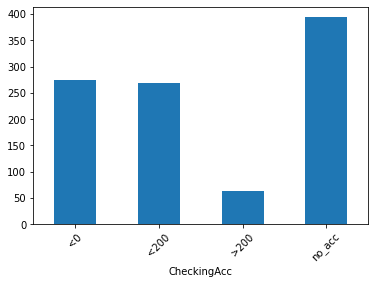

In [104]:
# Groupby unique values in CheckingAcc and barplot
grouped = df1.groupby(by = 'CheckingAcc').size()
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' existing other credits'),
  Text(1, 0, 'all credits'),
  Text(2, 0, 'delay in pay back'),
  Text(3, 0, 'no credits'),
  Text(4, 0, 'paid back')])

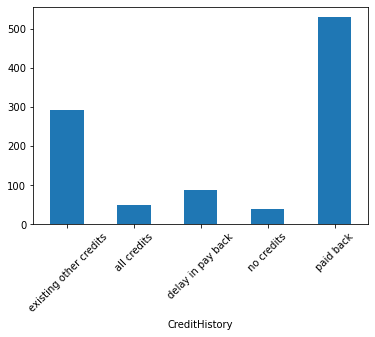

In [105]:
# Groupby unique values in CreditHistory and barplot
grouped = df1.groupby(by = 'CreditHistory').size()
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'business'),
  Text(1, 0, 'car (new)'),
  Text(2, 0, 'car (used)'),
  Text(3, 0, 'domestic appliances'),
  Text(4, 0, 'education'),
  Text(5, 0, 'furniture/equipment'),
  Text(6, 0, 'others'),
  Text(7, 0, 'radio/television'),
  Text(8, 0, 'repairs'),
  Text(9, 0, 'retraining')])

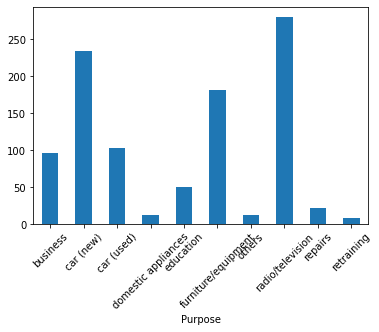

In [106]:
# Groupby unique values in Purpose and barplot
grouped = df1.groupby(by = 'Purpose').size()
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '<100'),
  Text(1, 0, '100-500'),
  Text(2, 0, '500-1000'),
  Text(3, 0, '>=1000'),
  Text(4, 0, 'no_acc')])

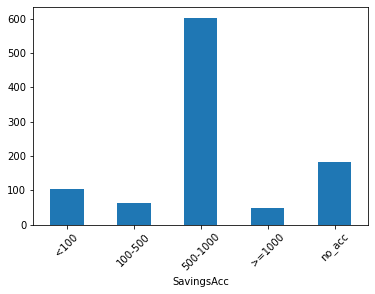

In [143]:
# Groupby unique values in SavingsAcc and barplot
grouped = df1.groupby(by = 'SavingsAcc').size()

# Sort the order of xticks label for graph
grouped.index = grouped.index[[2,0,1,3,4]]
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '<1'),
  Text(1, 0, '1-4'),
  Text(2, 0, '4-7'),
  Text(3, 0, '>=7'),
  Text(4, 0, 'unemployed')])

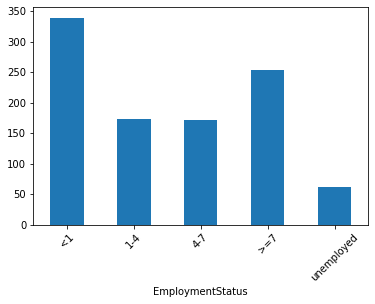

In [134]:
# Groupby unique values in EmploymentStatus and barplot
grouped = df1.groupby(by = 'EmploymentStatus').size()
grouped.index = grouped.index[[2,0,1,3,4]]
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'female : divorced/separated/married'),
  Text(1, 0, 'male : divorced/separated'),
  Text(2, 0, 'male : married/widowed'),
  Text(3, 0, 'male : single')])

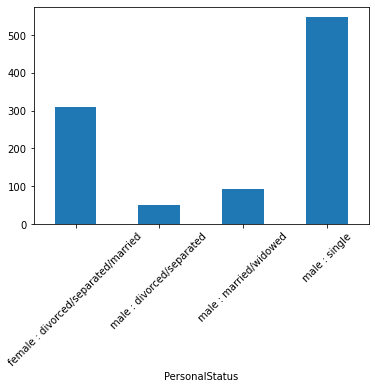

In [88]:
# Groupby unique values in PersonalStatus and barplot
grouped = df1.groupby(by = 'PersonalStatus').size()
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2]),
 [Text(0, 0, 'co-applicant'), Text(1, 0, 'guarantor'), Text(2, 0, 'none')])

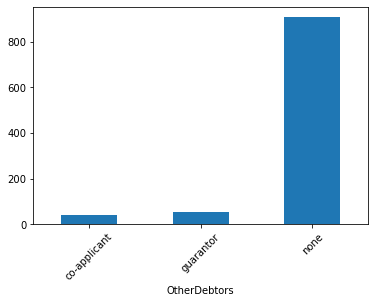

In [89]:
# Groupby unique values in OtherDebtors and barplot
grouped = df1.groupby(by = 'OtherDebtors').size()
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'car or other,'),
  Text(1, 0, 'real estate'),
  Text(2, 0, 'society savings'),
  Text(3, 0, 'no property')])

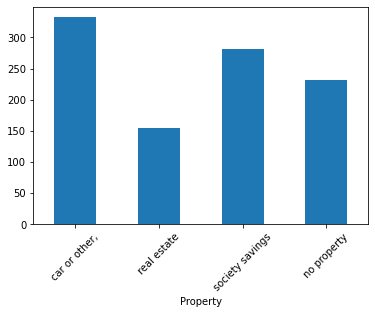

In [135]:
# Groupby unique values in Property and barplot
grouped = df1.groupby(by = 'Property').size()
grouped.index = grouped.index[[0,2,3,1]]
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2]),
 [Text(0, 0, 'bank'), Text(1, 0, 'stores'), Text(2, 0, 'none')])

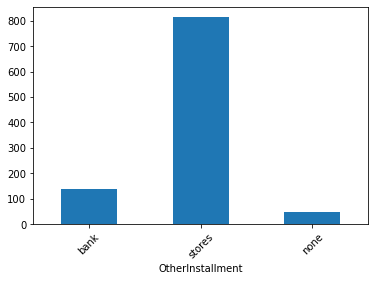

In [139]:
# Groupby unique values in OtherInstallment and barplot
grouped = df1.groupby(by = 'OtherInstallment').size()
grouped.index = grouped.index[[0,2,1]]
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2]), [Text(0, 0, 'free'), Text(1, 0, 'own'), Text(2, 0, 'rent')])

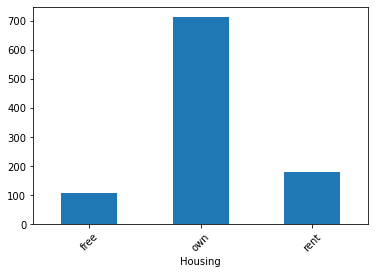

In [92]:
# Groupby unique values in Housing and barplot
grouped = df1.groupby(by = 'Housing').size()
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'self-employed'),
  Text(1, 0, 'skilled employee'),
  Text(2, 0, 'unskilled - resident'),
  Text(3, 0, 'unskilled - non-resident')])

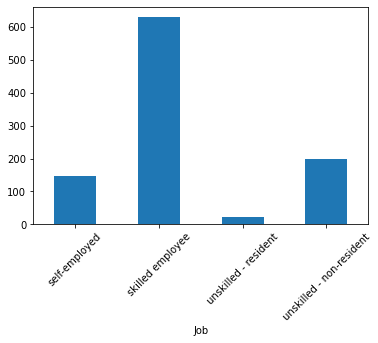

In [140]:
# Groupby unique values in Job and barplot
grouped = df1.groupby(by = 'Job').size()
grouped.index = grouped.index[[0,1,3,2]]
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'yes'), Text(1, 0, 'none')])

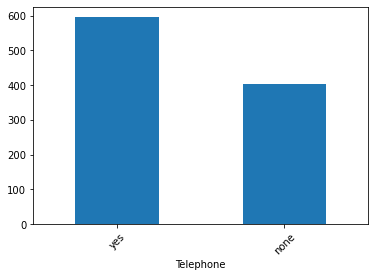

In [141]:
# Groupby unique values in Telephone and barplot
grouped = df1.groupby(by = 'Telephone').size()
grouped.index = grouped.index[[1,0]]
grouped.plot.bar()
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'yes'), Text(1, 0, 'no')])

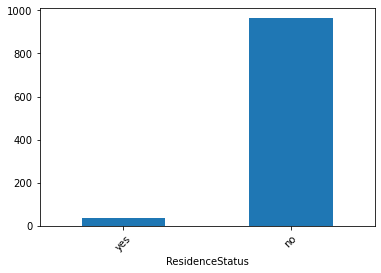

In [142]:
# Groupby unique values in ResidenceStatus and barplot
grouped = df1.groupby(by = 'ResidenceStatus').size()
grouped.index = grouped.index[[1,0]]
grouped.plot.bar()
plt.xticks(rotation = 45)